<a href="https://colab.research.google.com/github/markquark125/Summer-MicroCredentials/blob/main/Diabetic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For reference:
https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission

# Task 1: Identify the Problem

Your goal is to make a classification model that can be used to predict something within the
dataset.

For this project, I'll choose to predict whether a patient is likely to be a readmit in the
hospital within 30 days.

You can choose which features to use in your model (race, gender, age, etc.) and train your model.

Your project should include a description of what you’re trying to accomplish, EDA, data
wrangling, model creation, model evaluations, and model selections.

Your analytics should include at least 2 different types of models (i.e. KNN and Random Forest).

# Task 2: Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Task 3: Load the Data

In [2]:
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/markquark125/ML-Data/main/diabetic_data.csv')

# Task 4: EDA (Exploratory Data Analysis)

Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated
delivery networks. It includes over 50 features representing patient and hospital outcomes.
Information was extracted from the database for encounters that satisfied the following criteria.

* It is an inpatient encounter (a hospital admission).

* It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system
as a diagnosis.

* The length of stay was at least 1 day and at most 14 days.

* Laboratory tests were performed during the encounter.

* Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in
hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test
result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient,
and emergency visits in the year before the hospitalization, etc.

In [3]:
diabetes_df

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                      1  ...          No      No                   No   
1                      3  ...          No      Up                   No   
2                      2  ...          No      No                   No   
3                      2  ...          No      Up                   No   
4                      1  ...          No  Steady                   No   
...                  ...  ...         ...     ...                  ...   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
0                        No                        No   
1                        No                        No   
2                        No                        No   
3                        No                        No   
4                        No                        No   
...                     ...                       ...   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
0                            No                      No      No          No   
1                            No                      No      Ch         Yes   
2                            No                      No      No         Yes   
3                            No                      No      Ch         Yes   
4                            No                      No      Ch         Yes   
...                         ...                     ...     ...         ...   
101761                       No

In [4]:
diabetes_df.shape

(101766, 50)

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Check for any null values.



In [6]:
diabetes_df.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  False   False              False                     False                False             False       False              False               False           False            False              False             False             F

We want to see the unique values in each column. 

In [7]:
for i in diabetes_df.columns:
    print(i,'has ', set(diabetes_df[i]))

encounter_id has  {77856768, 173015040, 84934662, 273678342, 17563668, 289669140, 39845910, 434372630, 49545240, 56623128, 206831640, 398458910, 177995808, 78643242, 133693482, 309592106, 61866030, 16515126, 142868538, 224657466, 54263868, 14417982, 181141572, 115605576, 425459786, 309592142, 6291540, 256376916, 147325014, 396099668, 143655000, 175112280, 84934746, 401342552, 158335068, 149946462, 364380254, 12058722, 137887842, 123994212, 227016804, 257687652, 270794850, 114294888, 192151656, 57409644, 148897902, 24117366, 131858550, 441450614, 99352698, 247988346, 149160060, 312475772, 150470784, 152830080, 73662594, 143130756, 290455686, 425459846, 201851016, 108789900, 143655054, 184811664, 188743824, 407896208, 98566296, 402653336, 139722906, 159645852, 157024416, 290717856, 90701988, 128450724, 232521894, 127402152, 321388712, 72089772, 110100654, 24903858, 72351924, 136315062, 245629110, 282067128, 81789114, 100925628, 68157636, 40632522, 4980942, 402653390, 27001044, 264765654,

In [8]:
# Check for missing values in dataset. In the dataset missing values are represented as '?' sign.
for col in diabetes_df.columns:
    if diabetes_df[col].dtype == object:
         print(col, diabetes_df[col][ diabetes_df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


We can drop features with a lot of missing values and things that don't need to consider, like `encounter_id` and `patient_nbr`.

In [9]:
diabetes_df = diabetes_df.drop(['weight','payer_code','medical_specialty','encounter_id','patient_nbr'], axis = 1)

In [10]:
diabetes_df

race  gender      age  admission_type_id  \
0             Caucasian  Female   [0-10)                  6   
1             Caucasian  Female  [10-20)                  1   
2       AfricanAmerican  Female  [20-30)                  1   
3             Caucasian    Male  [30-40)                  1   
4             Caucasian    Male  [40-50)                  1   
...                 ...     ...      ...                ...   
101761  AfricanAmerican    Male  [70-80)                  1   
101762  AfricanAmerican  Female  [80-90)                  1   
101763        Caucasian    Male  [70-80)                  1   
101764        Caucasian  Female  [80-90)                  2   
101765        Caucasian    Male  [70-80)                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             25                    1                 1   
1                              1                    7                 3   
2                              1                    7                 2   
3                              1                    7                 2   
4                              1                    7                 1   
...                          ...                  ...               ...   
101761                         3                    7                 3   
101762                         4                    5                 5   
101763                         1                    7                 1   
101764                         3                    7                10   
101765                         1                    7                 6   

        num_lab_procedures  num_procedures  num_medications  ...  citoglipton  \
0                       41               0                1  ...           No   
1                       59               0               18  ...           No   
2                       11               5               13  ...           No   
3                       44               1               16  ...           No   
4                       51               0                8  ...           No   
...                    ...             ...              ...  ...          ...   
101761                  51               0               16  ...           No   
101762                  33               3               18  ...           No   
101763                  53               0                9  ...           No   
101764                  45               2               21  ...           No   
101765                  13               3                3  ...           No   

        insulin  glyburide-metformin glipizide-metformin  \
0            No                   No                  No   
1            Up                   No                  No   
2            No                   No                  No   
3            Up                   No                  No   
4        Steady                   No                  No   
...         ...                  ...                 ...   
101761     Down                   No                  No   
101762   Steady                   No                  No   
101763     Down                   No                  No   
101764       Up                   No                  No   
101765       No                   No                  No   

       glimepiride-pioglitazone metformin-rosiglitazone  \
0                            No                      No   
1                            No                      No   
2                            No                      No   
3                            No                      No   
4                            No                      No   
...                         ...                     ...   
101761                       No                      No   
101762                       No                      No   
101763                       No                      No   
101764                       No                      No   
101765            

In [11]:
for col in diabetes_df.columns:
    if diabetes_df[col].dtype == object:
         print(col, diabetes_df[col][ diabetes_df[col] == '?'].count())

race 2273
gender 0
age 0
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [12]:
print('Rows in \'gender\' with Unknown/Invalid: ', diabetes_df['gender'][diabetes_df['gender'] == 'Unknown/Invalid'].count())

Rows in 'gender' with Unknown/Invalid:  3


Variables `race`, `diag_1`, `diag_2`, `diag_3` and `gender` contains very less missing values as compared to other attributes which we dropped so for these attributes we also decided to drop those where missing values contains.

In [13]:
drop_Idx = set(diabetes_df[(diabetes_df['diag_1'] == '?') & (diabetes_df['diag_2'] == '?') & (diabetes_df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(diabetes_df['diag_1'][diabetes_df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(diabetes_df['diag_2'][diabetes_df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(diabetes_df['diag_3'][diabetes_df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(diabetes_df['race'][diabetes_df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(diabetes_df[diabetes_df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(diabetes_df['gender'][diabetes_df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(diabetes_df.index) - set(drop_Idx))

# New DataFrame using only acceptable rows, using the relevant row numbers.
diabetes_df = diabetes_df.iloc[new_Idx]

In [14]:
for col in diabetes_df.columns:
    if diabetes_df[col].dtype == object:
         print(col, diabetes_df[col][ diabetes_df[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [15]:
# Old shape was 101766 rows. We dropped rows with missing values.
diabetes_df.shape

(96446, 45)

Note that `citoglipton` and `examide` only have a value `No` so we could just drop that.

In [16]:
diabetes_df = diabetes_df.drop(['citoglipton', 'examide'], axis = 1)

In [17]:
diabetes_df

race  gender      age  admission_type_id  \
1             Caucasian  Female  [10-20)                  1   
2       AfricanAmerican  Female  [20-30)                  1   
3             Caucasian    Male  [30-40)                  1   
4             Caucasian    Male  [40-50)                  1   
5             Caucasian    Male  [50-60)                  2   
...                 ...     ...      ...                ...   
101761  AfricanAmerican    Male  [70-80)                  1   
101762  AfricanAmerican  Female  [80-90)                  1   
101763        Caucasian    Male  [70-80)                  1   
101764        Caucasian  Female  [80-90)                  2   
101765        Caucasian    Male  [70-80)                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                              1                    7                 3   
2                              1                    7                 2   
3                              1                    7                 2   
4                              1                    7                 1   
5                              1                    2                 3   
...                          ...                  ...               ...   
101761                         3                    7                 3   
101762                         4                    5                 5   
101763                         1                    7                 1   
101764                         3                    7                10   
101765                         1                    7                 6   

        num_lab_procedures  num_procedures  num_medications  ...  tolazamide  \
1                       59               0               18  ...          No   
2                       11               5               13  ...          No   
3                       44               1               16  ...          No   
4                       51               0                8  ...          No   
5                       31               6               16  ...          No   
...                    ...             ...              ...  ...         ...   
101761                  51               0               16  ...          No   
101762                  33               3               18  ...          No   
101763                  53               0                9  ...          No   
101764                  45               2               21  ...          No   
101765                  13               3                3  ...          No   

        insulin  glyburide-metformin glipizide-metformin  \
1            Up                   No                  No   
2            No                   No                  No   
3            Up                   No                  No   
4        Steady                   No                  No   
5        Steady                   No                  No   
...         ...                  ...                 ...   
101761     Down                   No                  No   
101762   Steady                   No                  No   
101763     Down                   No                  No   
101764       Up                   No                  No   
101765       No                   No                  No   

       glimepiride-pioglitazone metformin-rosiglitazone  \
1                            No                      No   
2                            No                      No   
3                            No                      No   
4                            No                      No   
5                            No                      No   
...                         ...                     ...   
101761                       No                      No   
101762                       No                      No   
101763                       No                      No   
101764                       No                      No   
101765                       N

In [18]:
# change string variables in 'readmitted' to ints so data can be passed into models
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace(['<30'], 1 )
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace(['>30'], 0 )
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace(['NO'], 0 )

In [19]:
set(diabetes_df['gender'])

{'Female', 'Male'}

In [20]:
diabetes_df['gender'] = diabetes_df['gender'].replace(['Male'], 1 )
diabetes_df['gender'] = diabetes_df['gender'].replace(['Female'], 0 )
diabetes_df['gender'] = diabetes_df['gender'].replace(['Unknown/Invalid'], 2 )

In [21]:
diabetes_df

race  gender      age  admission_type_id  \
1             Caucasian       0  [10-20)                  1   
2       AfricanAmerican       0  [20-30)                  1   
3             Caucasian       1  [30-40)                  1   
4             Caucasian       1  [40-50)                  1   
5             Caucasian       1  [50-60)                  2   
...                 ...     ...      ...                ...   
101761  AfricanAmerican       1  [70-80)                  1   
101762  AfricanAmerican       0  [80-90)                  1   
101763        Caucasian       1  [70-80)                  1   
101764        Caucasian       0  [80-90)                  2   
101765        Caucasian       1  [70-80)                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                              1                    7                 3   
2                              1                    7                 2   
3                              1                    7                 2   
4                              1                    7                 1   
5                              1                    2                 3   
...                          ...                  ...               ...   
101761                         3                    7                 3   
101762                         4                    5                 5   
101763                         1                    7                 1   
101764                         3                    7                10   
101765                         1                    7                 6   

        num_lab_procedures  num_procedures  num_medications  ...  tolazamide  \
1                       59               0               18  ...          No   
2                       11               5               13  ...          No   
3                       44               1               16  ...          No   
4                       51               0                8  ...          No   
5                       31               6               16  ...          No   
...                    ...             ...              ...  ...         ...   
101761                  51               0               16  ...          No   
101762                  33               3               18  ...          No   
101763                  53               0                9  ...          No   
101764                  45               2               21  ...          No   
101765                  13               3                3  ...          No   

        insulin  glyburide-metformin glipizide-metformin  \
1            Up                   No                  No   
2            No                   No                  No   
3            Up                   No                  No   
4        Steady                   No                  No   
5        Steady                   No                  No   
...         ...                  ...                 ...   
101761     Down                   No                  No   
101762   Steady                   No                  No   
101763     Down                   No                  No   
101764       Up                   No                  No   
101765       No                   No                  No   

       glimepiride-pioglitazone metformin-rosiglitazone  \
1                            No                      No   
2                            No                      No   
3                            No                      No   
4                            No                      No   
5                            No                      No   
...                         ...                     ...   
101761                       No                      No   
101762                       No                      No   
101763                       No                      No   
101764                       No                      No   
101765                       N

In [22]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96446 entries, 1 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      96446 non-null  object
 1   gender                    96446 non-null  int64 
 2   age                       96446 non-null  object
 3   admission_type_id         96446 non-null  int64 
 4   discharge_disposition_id  96446 non-null  int64 
 5   admission_source_id       96446 non-null  int64 
 6   time_in_hospital          96446 non-null  int64 
 7   num_lab_procedures        96446 non-null  int64 
 8   num_procedures            96446 non-null  int64 
 9   num_medications           96446 non-null  int64 
 10  number_outpatient         96446 non-null  int64 
 11  number_emergency          96446 non-null  int64 
 12  number_inpatient          96446 non-null  int64 
 13  diag_1                    96446 non-null  object
 14  diag_2               

In [23]:
for i in diabetes_df.columns:
    print(i,'has ', set(diabetes_df[i]))

race has  {'Asian', 'Hispanic', 'Other', 'Caucasian', 'AfricanAmerican'}
gender has  {0, 1}
age has  {'[90-100)', '[0-10)', '[10-20)', '[50-60)', '[30-40)', '[60-70)', '[80-90)', '[70-80)', '[20-30)', '[40-50)'}
admission_type_id has  {1, 2, 3, 4, 5, 6, 7, 8}
discharge_disposition_id has  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28}
admission_source_id has  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 20, 22, 25}
time_in_hospital has  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
num_lab_procedures has  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 1

Will turn objects to ints for ML algorithm. If there's an easier way, I haven't found it yet.

In [24]:
# change string variables in 'readmitted' to ints so data can be passed into models
diabetes_df['race'] = diabetes_df['race'].replace(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'], (0,1,2,3,4) )
diabetes_df['age'] = diabetes_df['age'].replace(['[0-10)', '[90-100)', '[10-20)', '[70-80)', '[30-40)', '[20-30)', '[60-70)', '[40-50)', '[80-90)', '[50-60)'], (0,1,2,3,4,5,6,7,8,9) )
diabetes_df['max_glu_serum'] = diabetes_df['max_glu_serum'].replace(['>300', '>200', 'None', 'Norm'],(0,1,2,3))
diabetes_df['A1Cresult'] = diabetes_df['A1Cresult'].replace(['>7', 'Norm', 'None', '>8'],(0,1,2,3))
diabetes_df['metformin'] = diabetes_df['metformin'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['repaglinide'] = diabetes_df['repaglinide'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['nateglinide'] = diabetes_df['nateglinide'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['chlorpropamide'] = diabetes_df['chlorpropamide'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['glimepiride'] = diabetes_df['glimepiride'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['acetohexamide'] = diabetes_df['acetohexamide'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['glipizide'] = diabetes_df['glipizide'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['glyburide'] = diabetes_df['glyburide'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['tolbutamide'] = diabetes_df['tolbutamide'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['pioglitazone'] = diabetes_df['pioglitazone'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['rosiglitazone'] = diabetes_df['rosiglitazone'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['acarbose'] = diabetes_df['acarbose'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['miglitol'] = diabetes_df['miglitol'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['troglitazone'] = diabetes_df['troglitazone'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['tolazamide'] = diabetes_df['tolazamide'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['insulin'] = diabetes_df['insulin'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['glyburide-metformin'] = diabetes_df['glyburide-metformin'].replace(['No', 'Up', 'Down', 'Steady'],(0,1,2,3))
diabetes_df['glimepiride-pioglitazone'] = diabetes_df['glimepiride-pioglitazone'].replace(['No', 'Steady'],(0,1))
diabetes_df['metformin-rosiglitazone'] = diabetes_df['metformin-rosiglitazone'].replace(['No', 'Steady'],(0,1))
diabetes_df['metformin-pioglitazone'] = diabetes_df['metformin-pioglitazone'].replace(['No', 'Steady'],(0,1))
diabetes_df['change'] = diabetes_df['change'].replace(['No', 'Ch'],(0,1))
diabetes_df['diabetesMed'] = diabetes_df['diabetesMed'].replace(['No', 'Yes'],(0,1))
diabetes_df['glipizide-metformin'] = diabetes_df['glipizide-metformin'].replace(['No', 'Steady'],(0,1))
 

In [25]:
diabetes_df

race  gender  age  admission_type_id  discharge_disposition_id  \
1          0       0    2                  1                         1   
2          1       0    5                  1                         1   
3          0       1    4                  1                         1   
4          0       1    7                  1                         1   
5          0       1    9                  2                         1   
...      ...     ...  ...                ...                       ...   
101761     1       1    3                  1                         3   
101762     1       0    8                  1                         4   
101763     0       1    3                  1                         1   
101764     0       0    8                  2                         3   
101765     0       1    3                  1                         1   

        admission_source_id  time_in_hospital  num_lab_procedures  \
1                         7                 3                  59   
2                         7                 2                  11   
3                         7                 2                  44   
4                         7                 1                  51   
5                         2                 3                  31   
...                     ...               ...                 ...   
101761                    7                 3                  51   
101762                    5                 5                  33   
101763                    7                 1                  53   
101764                    7                10                  45   
101765                    7                 6                  13   

        num_procedures  num_medications  ...  tolazamide  insulin  \
1                    0               18  ...           0        1   
2                    5               13  ...           0        0   
3                    1               16  ...           0        1   
4                    0                8  ...           0        3   
5                    6               16  ...           0        3   
...                ...              ...  ...         ...      ...   
101761               0               16  ...           0        2   
101762               3               18  ...           0        3   
101763               0                9  ...           0        2   
101764               2               21  ...           0        1   
101765               3                3  ...           0        0   

        glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
1                         0                   0                        0   
2                         0                   0                        0   
3                         0                   0                        0   
4                         0                   0                        0   
5                         0                   0                        0   
...                     ...                 ...                      ...   
101761                    0                   0                        0   
101762                    0                   0                        0   
101763                    0                   0                        0   
101764                    0                   0                        0   
101765                    0                   0                        0   

       metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  \
1                            0                       0       1            1   
2                            0                       0       0            1   
3                            0                       0       1            1   
4                            0                       0       1            1   
5                            0                       0       0            1   
...                        ...                     ...     ...          ..

In [26]:
for i in diabetes_df.columns:
    print(i,'has ', set(diabetes_df[i]))

race has  {0, 1, 2, 3, 4}
gender has  {0, 1}
age has  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
admission_type_id has  {1, 2, 3, 4, 5, 6, 7, 8}
discharge_disposition_id has  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28}
admission_source_id has  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 20, 22, 25}
time_in_hospital has  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
num_lab_procedures has  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 113, 114, 118, 120, 121, 126, 129, 132}
num_procedures has  {0, 1, 2, 3, 4, 5, 6}
num_medications has  {1, 2, 3, 4, 5, 6, 7

In [27]:
diabetes_df = diabetes_df.drop(['diag_1','diag_2','diag_3'], axis = 1)

In [28]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96446 entries, 1 to 101765
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      96446 non-null  int64
 1   gender                    96446 non-null  int64
 2   age                       96446 non-null  int64
 3   admission_type_id         96446 non-null  int64
 4   discharge_disposition_id  96446 non-null  int64
 5   admission_source_id       96446 non-null  int64
 6   time_in_hospital          96446 non-null  int64
 7   num_lab_procedures        96446 non-null  int64
 8   num_procedures            96446 non-null  int64
 9   num_medications           96446 non-null  int64
 10  number_outpatient         96446 non-null  int64
 11  number_emergency          96446 non-null  int64
 12  number_inpatient          96446 non-null  int64
 13  number_diagnoses          96446 non-null  int64
 14  max_glu_serum             96446 non-n

# Task 5: Data Visualization

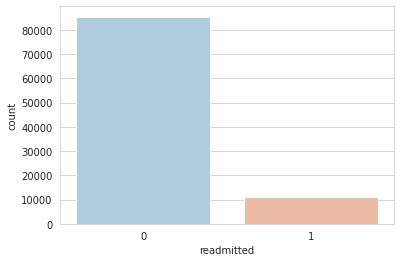

In [29]:
sns.set_style('whitegrid')
sns.countplot(x= 'readmitted', data=diabetes_df, palette="RdBu_r")

Approximately 10,000 readmissions within 30 days.

Note,
* 0 - Caucasian
* 1 - African American
* 2 - Other
* 3 - Asian
* 4 - Hispanic

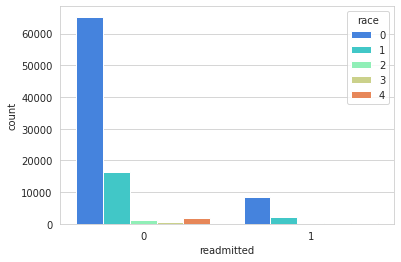

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='readmitted', hue='race', data=diabetes_df, palette='rainbow')

Most hospital patients are white. It looks like most of the readmissions are Caucasian and African American.

# Task 6: Compute the Cost Function

# Task 7: Train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df.drop(['readmitted'],axis=1), diabetes_df['readmitted'], test_size=0.3, random_state=1)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     25616
           1       0.41      0.02      0.03      3318

    accuracy                           0.88     28934
   macro avg       0.65      0.51      0.48     28934
weighted avg       0.83      0.88      0.83     28934



# Task 8: KNN

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(diabetes_df.drop(['readmitted'], axis = 1))

StandardScaler()

In [42]:
scaled_features = scaler.transform(diabetes_df.drop(['readmitted'], axis=1))

In [43]:
X_train,X_test, y_train, y_test = train_test_split(scaled_features, diabetes_df['readmitted'], test_size=0.33)

In [44]:
df_feat = pd.DataFrame(scaled_features, columns=diabetes_df.columns[:-1])

In [45]:
df_feat

race    gender       age  admission_type_id  \
0     -0.443453 -0.924401 -1.666197          -0.710236   
1      0.926434 -0.924401 -0.393731          -0.710236   
2     -0.443453  1.081782 -0.817886          -0.710236   
3     -0.443453  1.081782  0.454580          -0.710236   
4     -0.443453  1.081782  1.302890          -0.021024   
...         ...       ...       ...                ...   
96441  0.926434  1.081782 -1.242042          -0.710236   
96442  0.926434 -0.924401  0.878735          -0.710236   
96443 -0.443453  1.081782 -1.242042          -0.710236   
96444 -0.443453 -0.924401  0.878735          -0.021024   
96445 -0.443453  1.081782 -1.242042          -0.710236   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
0                     -0.499595             0.304214         -0.474616   
1                     -0.499595             0.304214         -0.809926   
2                     -0.499595             0.304214         -0.809926   
3                     -0.499595             0.304214         -1.145236   
4                     -0.499595            -0.923060         -0.474616   
...                         ...                  ...               ...   
96441                 -0.120068             0.304214         -0.474616   
96442                  0.069695            -0.186696          0.196004   
96443                 -0.499595             0.304214         -1.145236   
96444                 -0.120068             0.304214          1.872554   
96445                 -0.499595             0.304214          0.531314   

       num_lab_procedures  num_procedures  num_medications  ...  troglitazone  \
0                0.814321       -0.787961         0.237818  ...     -0.005577   
1               -1.627597        2.147733        -0.381571  ...     -0.005577   
2                0.051221       -0.200823        -0.009938  ...     -0.005577   
3                0.407334       -0.787961        -1.000960  ...     -0.005577   
4               -0.610131        2.734872        -0.009938  ...     -0.005577   
...                   ...             ...              ...  ...           ...   
96441            0.407334       -0.787961        -0.009938  ...     -0.005577   
96442           -0.508385        0.973455         0.237818  ...     -0.005577   
96443            0.509081       -0.787961        -0.877082  ...     -0.005577   
96444            0.102095        0.386316         0.609451  ...     -0.005577   
96445           -1.525851        0.973455        -1.620348  ...     -0.005577   

       tolazamide   insulin  glyburide-metformin  glipizide-metformin  \
0       -0.019473 -0.190338            -0.082882            -0.011611   
1       -0.019473 -0.951830            -0.082882            -0.011611   
2       -0.019473 -0.190338            -0.082882            -0.011611   
3       -0.019473  1.332647            -0.082882            -0.011611   
4       -0.019473  1.332647            -0.082882            -0.011611   
...           ...       ...                  ...                  ...   
96441   -0.019473  0.571155            -0.082882            -0.011611   
96442   -0.019473  1.332647            -0.082882            -0.011611   
96443   -0.019473  0.571155            -0.082882            -0.011611   
96444   -0.019473 -0.190338            -0.082882            -0.011611   
96445   -0.019473 -0.951830            -0.082882            -0.011611   

       glimepiride-pioglitazone  metformin-rosiglitazone  \
0                      -0.00322                      0.0   
1                      -0.00322                      0.0   
2                      -0.00322                      0.0   
3                      -0.00322                      0.0   
4                      -0.00322                      0.0   
...                         ...                      ...   
96441                  -0.00322                      0.0   
96442                  -0.00322                      0.0   
96443                  -0.00322    

In [46]:
X_train,X_test, y_train, y_test = train_test_split(scaled_features, diabetes_df['readmitted'], test_size=0.33)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
pred = knn.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(confusion_matrix(y_test,pred))

[[25037  3120]
 [ 3134   537]]


In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     28157
           1       0.15      0.15      0.15      3671

    accuracy                           0.80     31828
   macro avg       0.52      0.52      0.52     31828
weighted avg       0.80      0.80      0.80     31828



In [52]:
error_rate = []
# Will take some time
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

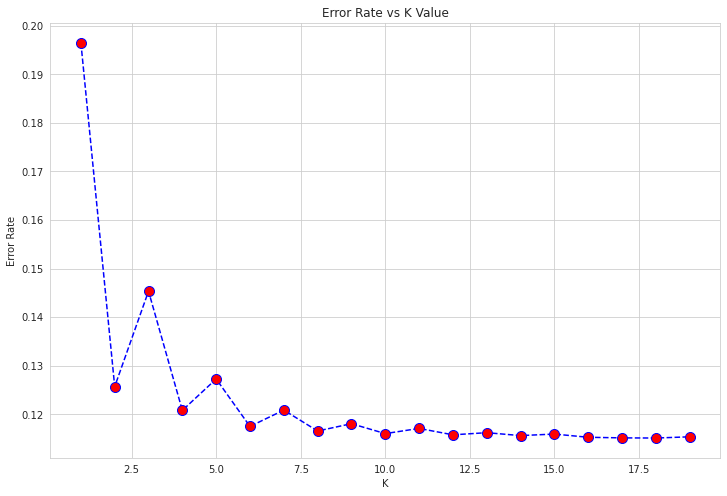

In [54]:
plt.figure(figsize=(12,8))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 5')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With k = 5
[[27615   542]
 [ 3509   162]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     28157
           1       0.23      0.04      0.07      3671

    accuracy                           0.87     31828
   macro avg       0.56      0.51      0.50     31828
weighted avg       0.81      0.87      0.83     31828



In [56]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 10')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With k = 10
[[28075    82]
 [ 3611    60]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     28157
           1       0.42      0.02      0.03      3671

    accuracy                           0.88     31828
   macro avg       0.65      0.51      0.48     31828
weighted avg       0.83      0.88      0.83     31828



# Task 9: Decision Tree

In [58]:
sns.set()

In [61]:
#!pip install pydot
#!pip install pydot-ng
#!pip install graphviz
#!pip install --upgrade scikit-learn==0.20.3
# Error for last one is because we are using an older scikit 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 22.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.20.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [63]:
X = diabetes_df.drop('readmitted', axis=1)
y = diabetes_df['readmitted']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [65]:
from sklearn.tree.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     25614
           1       0.15      0.18      0.16      3320

    accuracy                           0.79     28934
   macro avg       0.52      0.52      0.52     28934
weighted avg       0.81      0.79      0.80     28934



In [67]:
print(confusion_matrix(y_test,predictions))

[[22184  3430]
 [ 2724   596]]


In [69]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(diabetes_df.columns[:-1])
features

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

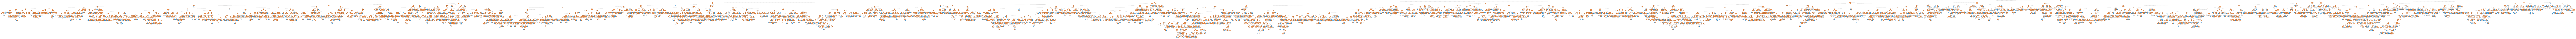

In [70]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Task 10: Making Predictions